### Load Modules

In [56]:
!pip install scikit-learn
!pip install opencv-python
!pip install numpy
!pip install matplotlib

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Prepare/collect data

In [58]:
import os

# Using raw string notation to avoid escape character issues
path = os.listdir(r'C:\Users\Impana\OneDrive\Desktop\vital_forecast\brain tumor\Training')
classes = {'no_tumor': 0, 'pituitary_tumor': 1}

In [59]:
import cv2
X = []
Y = []
for cls in classes:
    pth = os.path.join(r'C:\Users\Impana\OneDrive\Desktop\vital_forecast\brain tumor\Training', cls)  # Combine the base directory with the class name
    for j in os.listdir(pth):
        img_path = os.path.join(pth, j)  # Combine the class directory path with the image file name
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

In [60]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [61]:
np.unique(Y)

array([0, 1])

In [62]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [63]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

### Visualize data

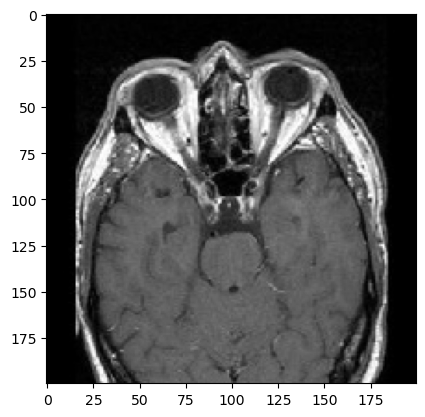

In [64]:
plt.imshow(X[0], cmap='gray')

### Prepare data

In [65]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

### Split Data

In [66]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=.20)

In [67]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

### Feature Scaling

In [68]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


### Feature Selection: PCA

In [69]:
from sklearn.decomposition import PCA

In [70]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [71]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

### Train Model

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [73]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)


LogisticRegression(C=0.1)

In [74]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

### Evaluation

In [75]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9591836734693877


In [76]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9938587512794268
Testing Score: 0.963265306122449


### Prediction

In [77]:
pred = sv.predict(xtest)


In [78]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [79]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  9
0 1


### TEST MODEL

In [80]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

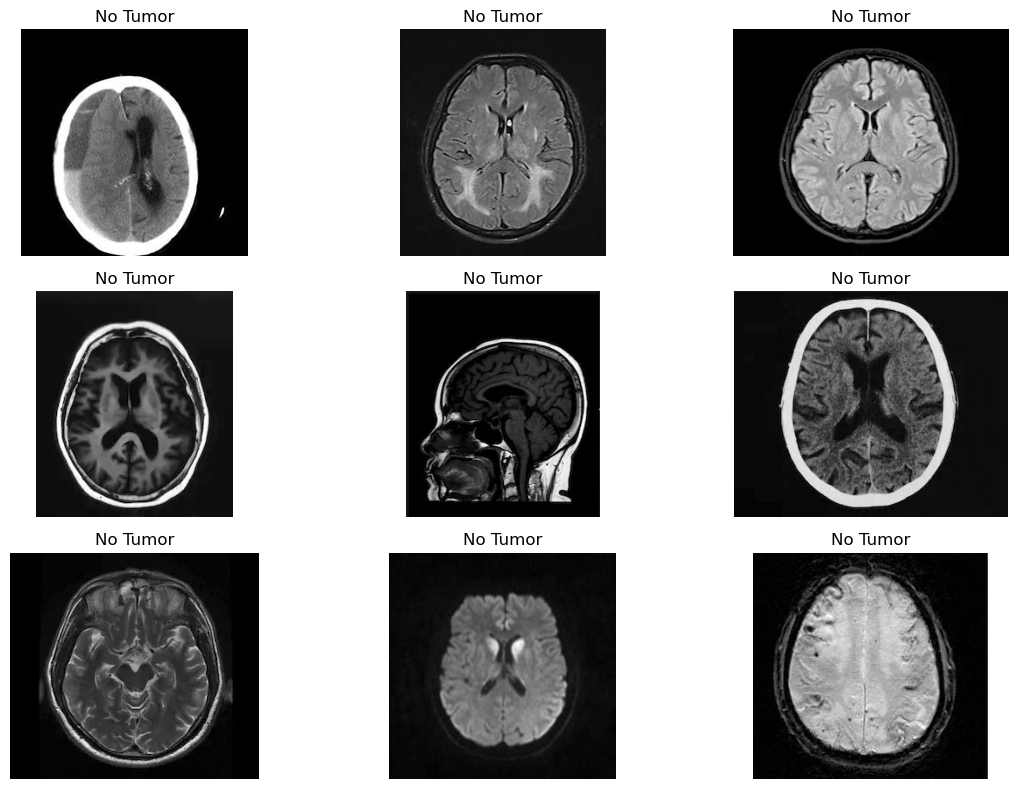

In [81]:
import os
import cv2
import matplotlib.pyplot as plt

# Correctly set the base directory path using a raw string
base_dir = r'C:\Users\Impana\OneDrive\Desktop\vital_forecast\brain tumor\Testing'

plt.figure(figsize=(12, 8))
c = 1
for i in os.listdir(os.path.join(base_dir, 'no_tumor'))[:9]:
    plt.subplot(3, 3, c)
    
    img_path = os.path.join(base_dir, 'no_tumor', i)
    img = cv2.imread(img_path, 0)
    
    if img is not None:
        img1 = cv2.resize(img, (200, 200))
        img1 = img1.reshape(1, -1) / 255  # Normalize if needed
        
        # Assuming sv is your trained model
        p = sv.predict(img1)
        
        plt.title(dec[p[0]])  # Assuming 'dec' is a dictionary mapping class indices to labels
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        
    c += 1

plt.tight_layout()
plt.show()


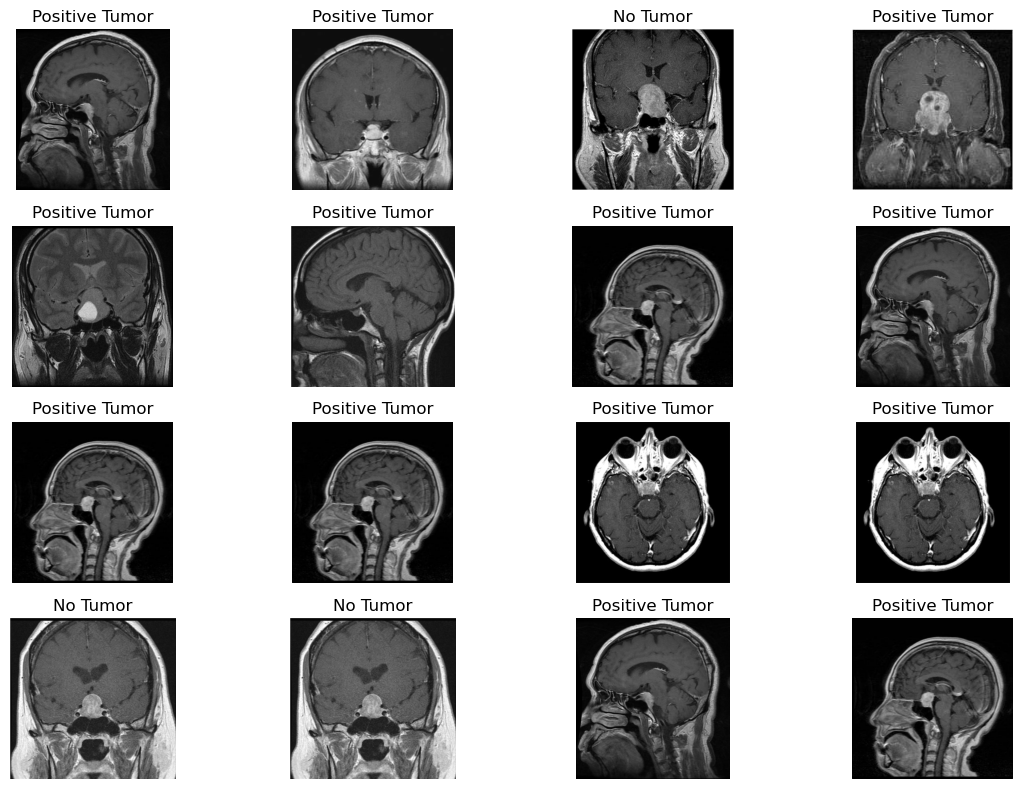

In [82]:
import os
import cv2
import matplotlib.pyplot as plt

# Correctly set the base directory path using a raw string
base_dir = r'C:\Users\Impana\OneDrive\Desktop\vital_forecast\brain tumor\Testing'

plt.figure(figsize=(12, 8))
c = 1
for i in os.listdir(os.path.join(base_dir, 'pituitary_tumor'))[:16]:
    plt.subplot(4, 4, c)
    
    img_path = os.path.join(base_dir, 'pituitary_tumor', i)
    img = cv2.imread(img_path, 0)
    
    if img is not None:
        img1 = cv2.resize(img, (200, 200))
        img1 = img1.reshape(1, -1) / 255  # Normalize if needed
        
        # Assuming sv is your trained model
        p = sv.predict(img1)
        
        plt.title(dec[p[0]])  # Assuming 'dec' is a dictionary mapping class indices to labels
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        
    c += 1

plt.tight_layout()
plt.show()


In [83]:
import pickle

In [84]:
model_path = 'brain tumor_model.sav'
with open(model_path, 'wb') as f:
    pickle.dump(sv, f)